In [2]:
#필요한 라이브러리 불러오기
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
#matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

### 0. 데이터 불러오기 및 살펴보기

In [3]:
input_fd = open('../YNZ 투자자 공모전 리그2/리그2/2_act_info.csv',errors = 'backslashreplace',encoding='utf-8')
act_info = pd.read_csv(input_fd)
act_info.head()

,act_id,cus_id,act_opn_ym
0,8e1a987ebef2a3374ba558aeda4c7821de7808a11cfea1...,892f41b5002a79c9c93992acf60682f5698372aea023bd...,197912
1,eb161b66263589c3f38efd2277cec2a9a81e1ffa0a5255...,006ad32069efb2a8ce1a99542dfe41cb14e8e75685278a...,198702
2,01866857515304e9e1315e54863cc1108e1d46fff0d467...,1925ed2d8ed2cad53997f5b24722482137c4d1da4b555e...,199109
3,63a58b0fee2fa4dc467c043fde465846b65705659497c5...,7829365dc463ed8275c8b92518d58b3c8d983f00f7bf87...,199401
4,b563fb76d3d432d67198f194701ca67e895da4c2f24e8e...,36e05dde058cf7531bd4001ed3b976ef9562a9ecd9f43d...,199404


In [4]:
input_fd = open('../YNZ 투자자 공모전 리그2/리그2/2_cus_info.csv',errors = 'backslashreplace',encoding='utf-8')
cus_info = pd.read_csv(input_fd)
cus_info.head()

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-


In [5]:
input_fd = open('../YNZ 투자자 공모전 리그2/리그2/2_iem_info.csv',errors = 'backslashreplace',encoding='utf-8')
iem_info = pd.read_csv(input_fd)
iem_info.head()

,iem_cd,iem_eng_nm,iem_krl_nm
0,A000060,Meritz Fire & Marine Insurance ...,메리츠화재해상보험보통주 ...
1,A000120,CJ LOGISTICS ...,씨제이대한통운보통주 ...
2,A000540,HeungkukFire&MarineInsurance ...,흥국화재해상보험보통주 ...
3,A00088K,HANWHA(3PB) ...,한화3우선주(신형) ...
4,A000950,Chonbang ...,전방보통주 ...


In [6]:
input_fd = open('../YNZ 투자자 공모전 리그2/리그2/2_trd_kr.csv',errors = 'backslashreplace',encoding='utf-8')
trd_kr = pd.read_csv(input_fd)
trd_kr.head()

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3
1,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,2,12,12,A001060,2,20.0,41100.0,3
2,effb34815e1b7efb34beb550f604ede8ac71a5a71edb30...,20190102,1,14,14,A281820,2,20.0,9460.0,4
3,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,1,12,12,A006650,2,1.0,148500.0,3
4,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,2,12,13,A051360,2,10.0,6550.0,3


In [7]:
input_fd = open('../YNZ 투자자 공모전 리그2/리그2/2_trd_oss.csv',errors = 'backslashreplace',encoding='utf-8')
trd_oss = pd.read_csv(input_fd)
trd_oss.head()

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00


### 1. Y&Z 세대는 어떤 기업에 가장 많이 투자할까?

20대/30대/40대가 가장 많이 투자하는 기업 top20(국내/해외 각각)을 조사한다. 또한, 코로나로 인해 주식 투자 양상이 어떻게 달라졌을지 분석하기 위해 2019년 데이터와 2020년 데이터를 분리 후 분석을 시행한다.(2020년 데이터의 경우, 2020년 6월까지의 데이터이기 때문에 orr_dt < 20200630 으로 처리한다.)

In [8]:
#테이블 병합(국내기업 투자 데이터)
iem_trd = pd.merge(trd_kr, iem_info, on = 'iem_cd', how = 'left')
iem_trd_act = pd.merge(iem_trd, act_info, on = 'act_id', how = 'left')
iem_trd_act_cus = pd.merge(iem_trd_act, cus_info, on = 'cus_id', how = 'left')

In [9]:
#Z세대(20대)
iem_trd_act_cus_20 = iem_trd_act_cus[(iem_trd_act_cus['cus_age']==20) | (iem_trd_act_cus['cus_age']==25)]
iem_trd_act_cus_20.reset_index(drop = True, inplace = True)

In [10]:
#Y세대(30대)
iem_trd_act_cus_30 = iem_trd_act_cus[(iem_trd_act_cus['cus_age'] == 30) | (iem_trd_act_cus['cus_age'] == 35)]
iem_trd_act_cus_30.reset_index(drop = True, inplace = True)

In [11]:
#X세대(40대)
iem_trd_act_cus_40 = iem_trd_act_cus[(iem_trd_act_cus['cus_age'] == 40) | (iem_trd_act_cus['cus_age'] == 45)]
iem_trd_act_cus_40.reset_index(drop = True, inplace = True)

In [14]:
iem_trd_act_cus_20_2019 = iem_trd_act_cus_20[(iem_trd_act_cus_20['orr_dt'] >=20190101) & (iem_trd_act_cus_20['orr_dt'] <=20191231)]
iem_trd_act_cus_20_2019.reset_index(drop = True, inplace = True)

In [15]:
iem_trd_act_cus_20_2020 = iem_trd_act_cus_20[(iem_trd_act_cus_20['orr_dt'] >=20200101) & (iem_trd_act_cus_20['orr_dt'] <=20200630)]
iem_trd_act_cus_20_2020.reset_index(drop = True, inplace = True)

In [16]:
iem_trd_act_cus_30_2019 = iem_trd_act_cus_30[(iem_trd_act_cus_30['orr_dt'] >=20190101) & (iem_trd_act_cus_30['orr_dt'] <=20191231)]
iem_trd_act_cus_30_2019.reset_index(drop = True, inplace = True)

In [17]:
iem_trd_act_cus_30_2020 = iem_trd_act_cus_30[(iem_trd_act_cus_30['orr_dt'] >=20200101) & (iem_trd_act_cus_30['orr_dt'] <=20200630)]
iem_trd_act_cus_30_2020.reset_index(drop = True, inplace = True)

In [13]:
iem_trd_act_cus_40_2019 = iem_trd_act_cus_40[(iem_trd_act_cus_40['orr_dt'] >=20190101) & (iem_trd_act_cus_40['orr_dt'] <=20191231)]
iem_trd_act_cus_40_2019.reset_index(drop = True, inplace = True)

In [18]:
iem_trd_act_cus_40_2020 = iem_trd_act_cus_40[(iem_trd_act_cus_40['orr_dt'] >=20200101) & (iem_trd_act_cus_40['orr_dt'] <=20200630)]
iem_trd_act_cus_40_2020.reset_index(drop = True, inplace = True)

In [19]:
#20대가 투자하는 top20 기업(국내, 2019)
iem_trd_act_cus_20_2019['iem_krl_nm'].value_counts().head(20)

삼성전자보통주                                                         924
국일제지                                                            867
머큐리                                                             557
아난티                                                             453
남선알미늄보통주                                                        450
신라젠                                                             413
에이치엘비                                                           410
경창산업                                                            400
위지윅스튜디오                                                         379
현대바이오사이언스                                                       358
후성 보통주                                                          353
키이스트                                                            348
에스케이하이닉스보통주                                                     321
필룩스보통주                                                          312
아시아나항공 보통주                                      

In [20]:
#20대가 투자하는 top20 기업(국내, 2020)
iem_trd_act_cus_20_2020['iem_krl_nm'].value_counts().head(20)

삼성전자보통주                                                         4056
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형)                           3779
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형]                                   1786
씨젠                                                              1722
남선알미늄보통주                                                        1421
카카오보통주                                                          1362
에스케이하이닉스보통주                                                     1276
삼성전자1우선주                                                        1275
빅텍                                                              1245
한진칼보통주                                                          1219
파미셀보통주                                                          1118
디피씨보통주                                                          1108
와이비엠넷                                                           1100
현대자동차보통주                                                        1077
신풍제약보통주                           

In [21]:
#30대가 투자하는 top20 기업(국내, 2019)
iem_trd_act_cus_30_2019['iem_krl_nm'].value_counts().head(20)

삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생                            5895
에이치엘비                                                           5262
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형]                                   2493
국일제지                                                            2255
삼성전자보통주                                                         2143
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형)                           1664
필룩스보통주                                                          1580
신라젠                                                             1542
에스모                                                             1372
에스케이하이닉스보통주                                                     1270
인스코비보통주                                                         1133
파미셀보통주                                                          1124
아시아나항공 보통주                                                      1112
에어부산보통주                                                         1043
현대바이오사이언스                         

In [22]:
#30대가 투자하는 top20 기업(국내, 2020)
iem_trd_act_cus_30_2020['iem_krl_nm'].value_counts().head(20)

삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형)                           9268
삼성전자보통주                                                         9072
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형]                                   5049
씨젠                                                              3812
삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생                            3561
웰크론                                                             3223
신풍제약보통주                                                         2893
한진칼보통주                                                          2853
에스케이하이닉스보통주                                                     2783
파미셀보통주                                                          2727
남선알미늄보통주                                                        2724
셀트리온헬스케어                                                        2588
삼성 KODEX WTI원유선물특별자산상장지수투자신탁[원유-파생형](                           2556
삼성전자1우선주                                                        2548
디피씨보통주                            

In [23]:
#40대가 투자하는 top20 기업(국내, 2019)
iem_trd_act_cus_40_2019['iem_krl_nm'].value_counts().head(20)

케이씨그린홀딩스보통주                                                     36654
한창보통주                                                           23067
에이치엠엠보통주                                                        23041
미래산업보통주                                                         22090
데코앤이                                                            14545
홈캐스트                                                            14351
삼성전자보통주                                                          5291
현대미포조선보통주                                                        4380
이화전기공업                                                           4086
국일제지                                                             3579
마니커보통주                                                           3350
신라젠                                                              2472
이엔플러스보통주                                                         1982
에이치엘비                                                            1962
율호                  

In [24]:
#40대가 투자하는 top20 기업(국내, 2020)
iem_trd_act_cus_40_2020['iem_krl_nm'].value_counts().head(20)

케이씨그린홀딩스보통주                                                     22370
한창보통주                                                           17791
삼성전자보통주                                                         16638
에이치엠엠보통주                                                        12178
홈캐스트                                                            11866
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형)                            4852
신풍제약보통주                                                          4388
씨젠                                                               3822
미래산업보통주                                                          3810
남선알미늄보통주                                                         3463
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형]                                    3171
와이비엠넷                                                            3073
셀트리온보통주                                                          2984
에스케이하이닉스보통주                                                      2895
미코                  

- 기성세대로 갈수록 count가 눈에 띄게 늘어나는 것을 통해 연령대가 높아질수록 주식투자를 많이 한다는 것을 알 수 있다. 일반적으로 나이가 많을수록 자산이 많기 때문에 주식투자 또한 연령대가 높아질수록 많이 하는 것으로 나타나는 것으로 보인다. 
- 20대, 30대의 경우 2020년은 상반기 데이터뿐임에도 불구하고 2019년보다 2020년의 count가 월등히 높은 것을 통해 코로나19로 인해 Y&Z 세대의 주식투자에 대한 관심이 증가한 것을 확인할 수 있다.
- 2020년이 되자 전 세대에서 공통적으로 '씨젠'이 순위권에 나타나는 것을 알 수 있다. '씨젠'은 시약 및 의료용품 제조업체로, 코로나19의 진단 키트를 세계 최초로 개발해낸 회사로 잘 알려져 있다. 이를 통해 코로나19가 주식시장에도 큰 영향을 주는 것을 알 수 있다.

trd_oss에 대해서도 동일한 분석을 시행한다.

In [26]:
#테이블 병합(해외기업 투자 데이터)
iem_trd_oss = pd.merge(trd_oss, iem_info, on = 'iem_cd', how = 'left')
iem_trd_act_oss = pd.merge(iem_trd_oss, act_info, on = 'act_id', how = 'left')
iem_trd_act_cus_oss = pd.merge(iem_trd_act_oss, cus_info, on = 'cus_id', how = 'left')

In [27]:
#20대
iem_trd_act_cus_20_oss = iem_trd_act_cus_oss[(iem_trd_act_cus_oss['cus_age']==20) | (iem_trd_act_cus_oss['cus_age']==25)]
iem_trd_act_cus_20_oss.reset_index(drop = True, inplace = True)

In [28]:
#30대
iem_trd_act_cus_30_oss = iem_trd_act_cus_oss[(iem_trd_act_cus_oss['cus_age']==30) | (iem_trd_act_cus_oss['cus_age']==35)]
iem_trd_act_cus_30_oss.reset_index(drop = True, inplace = True)

In [29]:
#40대
iem_trd_act_cus_40_oss = iem_trd_act_cus_oss[(iem_trd_act_cus_oss['cus_age']==40) | (iem_trd_act_cus_oss['cus_age']==45)]
iem_trd_act_cus_40_oss.reset_index(drop = True, inplace = True)

In [30]:
iem_trd_act_cus_20_oss_2019 = iem_trd_act_cus_20_oss[(iem_trd_act_cus_20_oss['orr_dt'] >=20190101) & (iem_trd_act_cus_20_oss['orr_dt'] <=20191231)]
iem_trd_act_cus_20_oss_2019.reset_index(drop = True, inplace = True)

In [31]:
iem_trd_act_cus_20_oss_2020 = iem_trd_act_cus_20_oss[(iem_trd_act_cus_20_oss['orr_dt'] >=20200101) & (iem_trd_act_cus_20_oss['orr_dt'] <=20200630)]
iem_trd_act_cus_20_oss_2020.reset_index(drop = True, inplace = True)

In [32]:
iem_trd_act_cus_30_oss_2019 = iem_trd_act_cus_30_oss[(iem_trd_act_cus_30_oss['orr_dt'] >=20190101) & (iem_trd_act_cus_30_oss['orr_dt'] <=20191231)]
iem_trd_act_cus_30_oss_2019.reset_index(drop = True, inplace = True)

In [33]:
iem_trd_act_cus_30_oss_2020 = iem_trd_act_cus_30_oss[(iem_trd_act_cus_30_oss['orr_dt'] >=20200101) & (iem_trd_act_cus_30_oss['orr_dt'] <=20200630)]
iem_trd_act_cus_30_oss_2020.reset_index(drop = True, inplace = True)

In [34]:
iem_trd_act_cus_40_oss_2019 = iem_trd_act_cus_40_oss[(iem_trd_act_cus_40_oss['orr_dt'] >=20190101) & (iem_trd_act_cus_40_oss['orr_dt'] <=20191231)]
iem_trd_act_cus_40_oss_2019.reset_index(drop = True, inplace = True)

In [35]:
iem_trd_act_cus_40_oss_2020 = iem_trd_act_cus_40_oss[(iem_trd_act_cus_40_oss['orr_dt'] >=20200101) & (iem_trd_act_cus_40_oss['orr_dt'] <=20200630)]
iem_trd_act_cus_40_oss_2020.reset_index(drop = True, inplace = True)

In [36]:
#20대가 투자하는 top20 기업(해외, 2019)
iem_trd_act_cus_20_oss_2019['iem_krl_nm'].value_counts().head(20)

Direxion:Nat Gas Bull 3X                                        78
AMD                                                             57
VELOCITYSHARES 3X INVERSE NATURA ETN                            28
스타벅스                                                            28
VELOCITYSHARES 3X LNG NTRL GS ETN                               27
테슬라                                                             26
AT&T                                                            20
Nortech Systems Incorporated                                    17
Global X SuperDividend REIT                                     16
코카콜라                                                            14
CONSUMER DISCRETIONARY SELECT SPDR                              14
Kraneshares CSI 차이나 인터넷 펀드                                      13
테크놀로지셀렉트섹터SPDR펀드                                                13
FIRST TRUST DJ INTERNET IND                                     13
WISDOMTREE U.S. QUALITY DVD                                   

In [37]:
#20대가 투자하는 top20 기업(해외, 2020)
iem_trd_act_cus_20_oss_2020['iem_krl_nm'].value_counts().head(20)

델타 에어라인스                                                        255
퍼스트 머제스틱 실버                                                     222
마이크로소프트                                                         197
테슬라                                                             180
AMD                                                             174
코카콜라                                                            173
월트 디즈니                                                          166
보잉                                                              156
AT&T                                                            152
ProShares:UltP Sht QQQ                                          148
애플                                                              140
Virgin Galactic Holdings                                        129
MICRSECTRS US BIG OIL IDX 3X LVG ETN                            119
카니발                                                             105
Luckin Coffee                                   

In [38]:
#30대가 투자하는 top20 기업(해외, 2019)
iem_trd_act_cus_30_oss_2019['iem_krl_nm'].value_counts().head(20)

테슬라                                                             35
VELOCITYSHARES 3X LNG NTRL GS ETN                               34
월트 디즈니                                                          26
아머 레지덴셜 리츠                                                      25
애플                                                              24
FIRST TRUST VALUE LINE DVD                                      20
AT&T                                                            17
글로벌 네트 리스                                                       15
GUGGENHEIM STRATEGIC  OPPORTUNITY                               15
비자                                                              15
Luckin Coffee                                                   14
리얼티 인컴                                                          12
INVESCO S&P 500 HIGH DIVIDEND LOW VOL                           12
크래프트 하인즈                                                        11
VELOCITYSHARES 3X INVERSE NATURA ETN                          

In [39]:
#30대가 투자하는 top20 기업(해외, 2020)
iem_trd_act_cus_30_oss_2020['iem_krl_nm'].value_counts().head(20)

델타 에어라인스                                                        321
마이크로소프트                                                         260
EPR 프로퍼티스                                                       216
보잉                                                              214
아머 레지덴셜 리츠                                                      176
애플                                                              173
AT&T                                                            154
테슬라                                                             154
월트 디즈니                                                          147
코카콜라                                                            147
ProShares:UltP Sht QQQ                                          129
뱅가드토탈스톡마켓ETF                                                    122
카니발                                                             115
AMD                                                             112
리얼티 인컴                                          

In [40]:
#40대가 투자하는 top20 기업(해외, 2019)
iem_trd_act_cus_40_oss_2019['iem_krl_nm'].value_counts().head(20)

마이크로소프트                                                         68
AT&T                                                            65
리얼티 인컴                                                          60
FuelCell Energy                                                 52
Global X NASDAQ 100 Covered Call ETF                            49
아이셰어즈20+이어트레저리본드ETF                                             47
스타벅스                                                            45
애플                                                              41
INVESCO S&P 500 HIGH DIVIDEND LOW VOL                           35
알트리아 그룹                                                         32
iShares 7-10년 트레저리본드 ETF                                        30
LMIR Trust                                                      30
월트 디즈니                                                          29
디렉션데일리세미콘덕터스강세장3x셰어스                                            28
메인 스트리트 캐피털                                                   

In [41]:
#40대가 투자하는 top20 기업(해외, 2020)
iem_trd_act_cus_40_oss_2020['iem_krl_nm'].value_counts().head(20)

마이크로소프트                                                         286
애플                                                              235
CS VELOCITYSHARES 3X LNG NTRL GS ETN                            206
AT&T                                                            182
월트 디즈니                                                          167
리얼티 인컴                                                          163
델타 에어라인스                                                        152
테슬라                                                             136
US 글로벌 제츠 ETF                                                   113
스타벅스                                                            105
인텔                                                              104
MICRSECTRS US BIG OIL IDX 3X LVG ETN                             84
알파벳 CLASS A (voting)                                             81
NIO Inc.                                                         77
인베스코 QQQ 트러스트 시리즈 1                             

- 2019년에는 나타나지 않던 델타 에어라인스, 보잉 등 항공사 주식이 2020년이 되자 나타나는 것을 알 수 있다.
- 20대는 Uber(스마트폰 기반의 승차 공유 서비스) 등 첨단 기술을 사용한 기업에도 많이 투자하는 것으로 보인다.
- 2020년에는 아이바이오, 이노비오 파마수티컬스 등 제약/바이오 관련주에 대한 투자가 늘어난 것을 통해 코로나19가 주식시장에도 영향을 미쳤음을 알 수 있다.

### 2. Y&Z세대는 어떤 국가에 주로 투자할까?

거래통화코드를 각 나라의 주식을 산 것으로 해석하면(예: USD는 미국 주식에 투자) 각 연령대별로 어떤 국가에 많이 투자하는지 알 수 있다.

AUD: 오스트레일리아-달러 / CAD: 캐나다-달러 / CNY: 렌민비(위안) EUR: 유로 / GBP: 영국-파운드/ HKD: 홍콩-달러 / IDR: 루피아 /
JPY:일본-엔 / KRW: 대한민국-원 / SGD: 싱가포르-달러 /
USD: 미국-달러 / VND: 동

Text(0.5, 1.0, '거래통화코드(20대, 2019)')

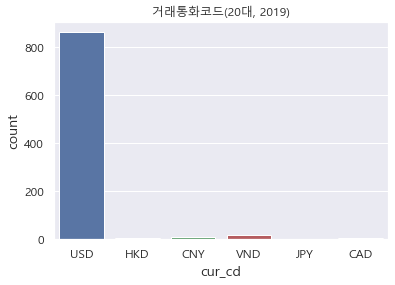

In [42]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data=iem_trd_act_cus_20_oss_2019) 
ax.set_title('거래통화코드(20대, 2019)') 

In [54]:
#20대, 2019 (위 그래프에서 잘 보이지 않는 자료는 value_counts로 count값 구함)
iem_trd_act_cus_20_oss_2019['cur_cd'].value_counts()

USD    861
VND     18
CNY      9
CAD      6
HKD      5
JPY      2
Name: cur_cd, dtype: int64

Text(0.5, 1.0, '거래통화코드(20대, 2020)')

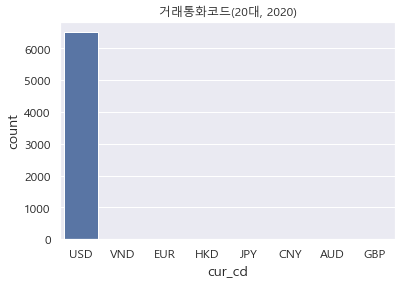

In [43]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data=iem_trd_act_cus_20_oss_2020) 
ax.set_title('거래통화코드(20대, 2020)') 

In [55]:
#20대, 2020
iem_trd_act_cus_20_oss_2020['cur_cd'].value_counts()

USD    6511
EUR      24
CNY      19
JPY      18
VND       7
HKD       6
GBP       2
AUD       2
Name: cur_cd, dtype: int64

Text(0.5, 1.0, '거래통화코드(30대, 2019)')

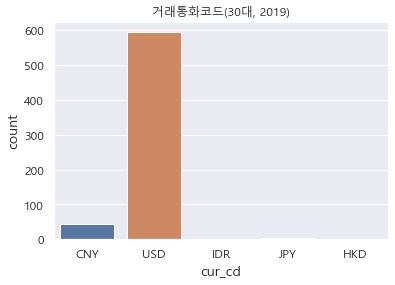

In [44]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data=iem_trd_act_cus_30_oss_2019) 
ax.set_title('거래통화코드(30대, 2019)') 

In [56]:
#30대, 2019
iem_trd_act_cus_30_oss_2019['cur_cd'].value_counts()

USD    594
CNY     43
JPY      3
IDR      1
HKD      1
Name: cur_cd, dtype: int64

Text(0.5, 1.0, '거래통화코드(30대, 2020)')

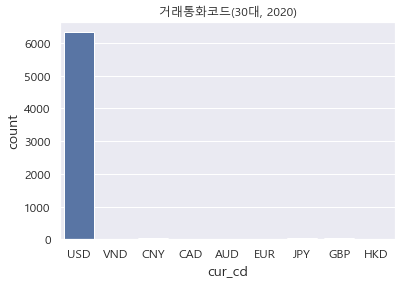

In [45]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data=iem_trd_act_cus_30_oss_2020) 
ax.set_title('거래통화코드(30대, 2020)') 

In [57]:
#30대, 2020
iem_trd_act_cus_30_oss_2020['cur_cd'].value_counts()

USD    6322
CNY      39
GBP      30
JPY      25
VND      11
HKD       8
AUD       4
EUR       3
CAD       2
Name: cur_cd, dtype: int64

Text(0.5, 1.0, '거래통화코드(40대, 2019)')

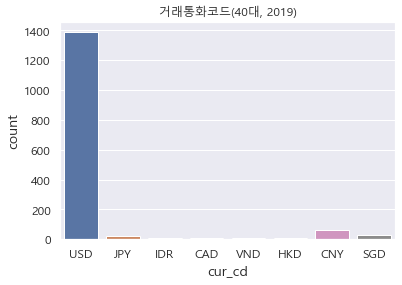

In [46]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data=iem_trd_act_cus_40_oss_2019) 
ax.set_title('거래통화코드(40대, 2019)') 

In [58]:
#40대, 2019
iem_trd_act_cus_40_oss_2019['cur_cd'].value_counts()

USD    1388
CNY      62
SGD      30
JPY      19
IDR      12
HKD       9
CAD       9
VND       8
Name: cur_cd, dtype: int64

Text(0.5, 1.0, '거래통화코드(40대, 2020)')

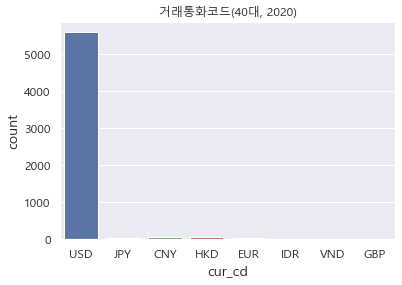

In [47]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data=iem_trd_act_cus_40_oss_2020) 
ax.set_title('거래통화코드(40대, 2020)') 

In [59]:
#40대, 2020
iem_trd_act_cus_40_oss_2020['cur_cd'].value_counts()

USD    5592
HKD      74
CNY      68
EUR      24
JPY      22
IDR      21
VND      15
GBP       2
Name: cur_cd, dtype: int64

- 2020년 미국에 대한 투자가 전 세대에 걸쳐 대폭 증가한 것을 확인할 수 있다. 특히 20대와 30대가 40대보다 더 높은 증가폭을 보이는 것을 확인할 수 있다. 
- 20대, 30대는 2019년보다 2020년에 더 다양한 국가에 투자를 하는 것으로 나타났다.
- 위 사실들을 통해 코로나19로 인해 Y&Z 세대의 주식에 대한 관심이 매우 높아졌음을 알 수 있다. 

### 3. Y&Z세대는 주식을 어떻게 살까? 

주문매체구분코드 데이터를 통해 Y&Z 세대는 어떻게 주식을 사는지, 주식을 사는 방식이 위 세대와 다른지 조사한다.

1:영업점단말 

2:유선단말

3:무선단말MTS

4:HTS

In [100]:
iem_trd_act_cus_20['orr_mdi_dit_cd'].value_counts()

3    198689
4     20654
1       526
Name: orr_mdi_dit_cd, dtype: int64

In [101]:
iem_trd_act_cus_30['orr_mdi_dit_cd'].value_counts()

3    583859
4     34672
1       220
Name: orr_mdi_dit_cd, dtype: int64

In [102]:
iem_trd_act_cus_40['orr_mdi_dit_cd'].value_counts()

3    836987
4    175090
1      5177
2       405
Name: orr_mdi_dit_cd, dtype: int64

In [96]:
iem_trd_act_cus_20_oss['orr_mdi_dit_cd'].value_counts()

3    7324
1     118
4      48
Name: orr_mdi_dit_cd, dtype: int64

In [98]:
iem_trd_act_cus_30_oss['orr_mdi_dit_cd'].value_counts()

3    6853
4     215
1      18
Name: orr_mdi_dit_cd, dtype: int64

In [99]:
iem_trd_act_cus_40_oss['orr_mdi_dit_cd'].value_counts()

3    6929
1     232
4     194
Name: orr_mdi_dit_cd, dtype: int64

모든 연령대가 무선단말MTS를 주로 사용했고, 40대(국내 주식)의 경우 다른 세대와 달리 유선단말도 사용하는 것을 알 수 있다. 위 내용을 시각화하면 다음과 같다.

Text(0.5, 1.0, '주문 매체(20대, 국내 주식)')

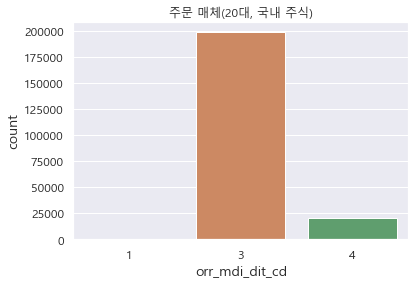

In [109]:
ax = plt.subplots() 
ax = sns.countplot('orr_mdi_dit_cd', data=iem_trd_act_cus_20) 
ax.set_title('주문 매체(20대, 국내 주식)') 

Text(0.5, 1.0, '주문 매체(30대, 국내 주식)')

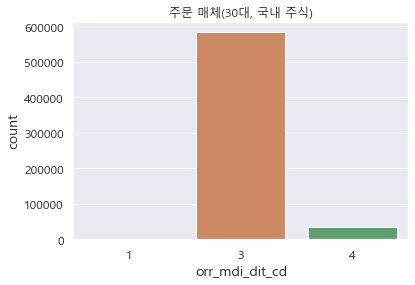

In [110]:
ax = plt.subplots() 
ax = sns.countplot('orr_mdi_dit_cd', data=iem_trd_act_cus_30) 
ax.set_title('주문 매체(30대, 국내 주식)') 

Text(0.5, 1.0, '주문 매체(40대, 국내 주식)')

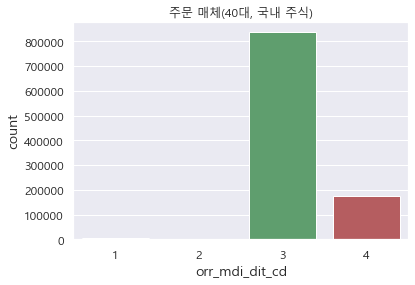

In [111]:
ax = plt.subplots() 
ax = sns.countplot('orr_mdi_dit_cd', data=iem_trd_act_cus_40) 
ax.set_title('주문 매체(40대, 국내 주식)') 

Text(0.5, 1.0, '주문 매체(20대, 해외 주식)')

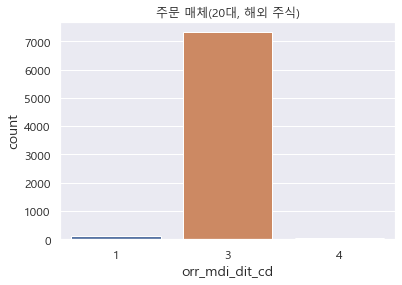

In [106]:
ax = plt.subplots() 
ax = sns.countplot('orr_mdi_dit_cd', data=iem_trd_act_cus_20_oss) 
ax.set_title('주문 매체(20대, 해외 주식)') 

Text(0.5, 1.0, '주문 매체(30대, 해외 주식)')

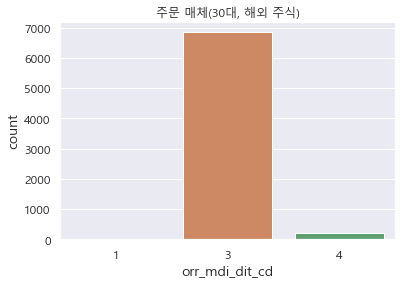

In [107]:
ax = plt.subplots() 
ax = sns.countplot('orr_mdi_dit_cd', data=iem_trd_act_cus_30_oss) 
ax.set_title('주문 매체(30대, 해외 주식)') 

Text(0.5, 1.0, '주문 매체(40대, 해외 주식)')

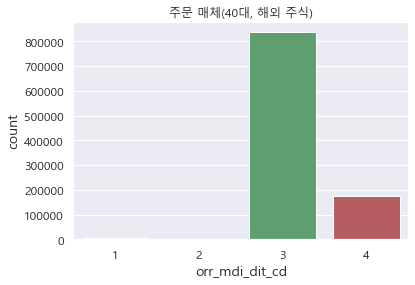

In [108]:
ax = plt.subplots() 
ax = sns.countplot('orr_mdi_dit_cd', data=iem_trd_act_cus_40) 
ax.set_title('주문 매체(40대, 해외 주식)') 